# Fitting a Line to Data using Matrix Math

Ellianna Abrahams, UC Berkeley

March 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "serif"

## Fit $\hat{\beta}$ Using $(X^TX)^{-1}X^TY$

In [2]:
# Define sample size and true parameters
n = 35
beta0_truth = 3.2
beta1_truth = 1.7

x0 = np.ones(n)
x1 = np.random.uniform(0.0, 1.0, n)
y = beta0_truth + beta1_truth*x1

X = np.column_stack((x0, x1))
Y = y.reshape(n,1)

print(X.shape)
print(Y.shape)

(35, 2)
(35, 1)


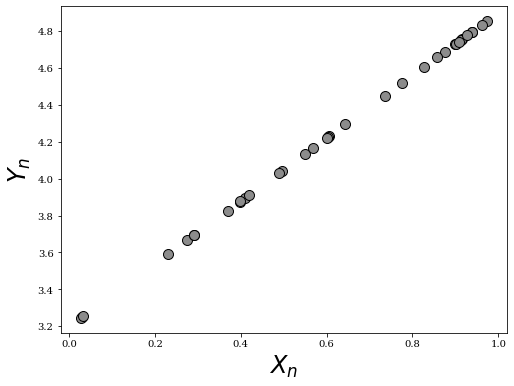

In [3]:
# It's a good idea to plot prefitted data 
# as points rather than as a connected line 
# so as not to impose a fit
fig = plt.figure(figsize=(8,6))
plt.scatter(x1, y, 
            s = 100,
            c='#8c8c8c', 
            edgecolor='k')
plt.xlabel('$X_n$', fontsize=24)
plt.ylabel('$Y_n$', fontsize=24)
plt.savefig('data.png')

In [4]:
# Use Eqtn. 3 to estimate \beta
# \hat{\beta} = (X^TX)^{-1}X^TY

beta_hat = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)

In [5]:
beta0_hat = beta_hat[0]
beta1_hat = beta_hat[1]

print("beta0_hat = {}".format(beta0_hat) + "\n" + "beta1_hat = {}".format(beta1_hat))

beta0_hat = [3.2]
beta1_hat = [1.7]


$\hat{\beta}$ matches $\beta$ exactly!

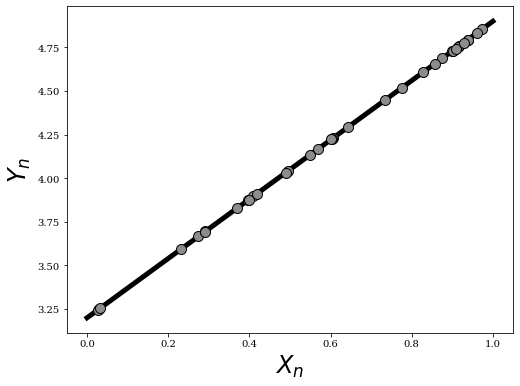

In [6]:
# As a sanity check, plot the fit 
fig = plt.figure(figsize=(8,6))
plt.scatter(x1, y, 
            s = 100,
            c='#8c8c8c', 
            edgecolor='k',
            zorder=1)

# While we plot the data as points,
# we plot the fit as a line
# because the fit interpolates between
# the measured data points
x_grid = np.linspace(0,1,1000)
y_hat = beta0_hat + beta1_hat*x_grid
plt.plot(x_grid, y_hat, 
         linewidth=5,
         c='k', zorder=0)

plt.xlabel('$X_n$', fontsize=24)
plt.ylabel('$Y_n$', fontsize=24)
plt.savefig('fit.png')

## Fit $\hat{\beta}$ Using Least Squares

We'll keep the same sample size as above at first of $n=35$, but this isn't very large. Let's see how least squares performs on this small sample size.

In [7]:
# Define sample size and true parameters
n = 35
beta0_truth = 3.2
beta1_truth = 1.7

x0 = np.ones(n)
x1 = np.random.uniform(0.0, 1.0, n)
y = beta0_truth + beta1_truth*x1

# Add normally distributed scatter
e = np.random.normal(0.0, 0.25, n)
y += e

X = np.column_stack((x0, x1))
Y = y.reshape(n,1)

print(X.shape)
print(Y.shape)

(35, 2)
(35, 1)


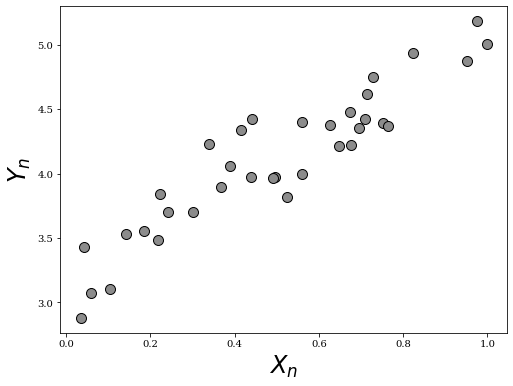

In [8]:
fig = plt.figure(figsize=(8,6))
plt.scatter(x1, y, 
            s = 100,
            c='#8c8c8c', 
            edgecolor='k')
plt.xlabel('$X_n$', fontsize=24)
plt.ylabel('$Y_n$', fontsize=24)
plt.savefig('ls_data.png')

In [9]:
# Use np.linalg.lstsq to solve for $\hat{\beta}$
# The following python operator will show
# the documentation
np.linalg.lstsq?

In [10]:
# Note from the documentation that the shape of y 
# needed for the function is different
# than the shape we used for y
# in the previous section
beta_hat = np.linalg.lstsq(X, y, rcond=None)[0]

In [11]:
beta0_hat = beta_hat[0]
beta1_hat = beta_hat[1]

print("beta0_hat = {}".format(beta0_hat) + "\n" + "beta1_hat = {}".format(beta1_hat))

beta0_hat = 3.17804011049047
beta1_hat = 1.8707259208932685


We can immediately see that Least Squares did not get $\hat{\beta}$ exactly, like it did in the previous section, but considering the strength of the scatter we see in the plot, this got really close! Let's plot the fit to see how it looks.

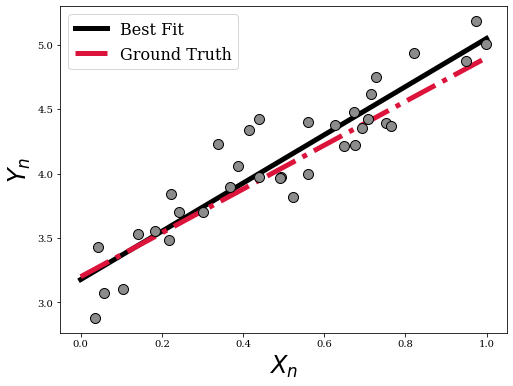

In [12]:
# As a sanity check, plot the fit 
fig = plt.figure(figsize=(8,6))
plt.scatter(x1, y, 
            s = 100,
            c='#8c8c8c', 
            edgecolor='k',
            zorder=1)

# While we plot the data as points,
# we plot the fit as a line
# because the fit interpolates between
# the measured data points
y_hat = beta0_hat + beta1_hat*x_grid
y_true = beta0_truth + beta1_truth*x_grid
plt.plot(x_grid, y_hat, 
         c='k', linewidth=5,
         label='Best Fit',
         zorder=0)
plt.plot(x_grid, y_true, 
         c='Crimson', linewidth=5,
         linestyle='-.',
         label='Ground Truth',
         zorder=0)

plt.xlabel('$X_n$', fontsize=24)
plt.ylabel('$Y_n$', fontsize=24)
plt.legend(loc='upper left', fontsize=16)
plt.savefig('ls_fit.png')

Now let's crossvalidate the fit to see the minimum number of sample points we need to get a fit that agrees with our true parameters within one significant figure. We'll plot across our crossvalidation grid to see when the fit starts to converge on the truth, starting with our current sample size of 35.

minimum sample size = 80
best_beta0_hat = 3.182762251256022
best_beta1_hat = 1.729155145679272


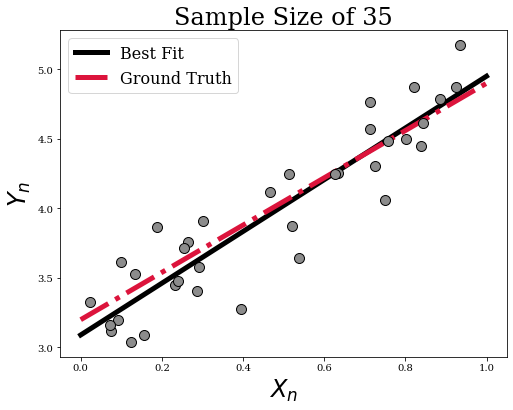

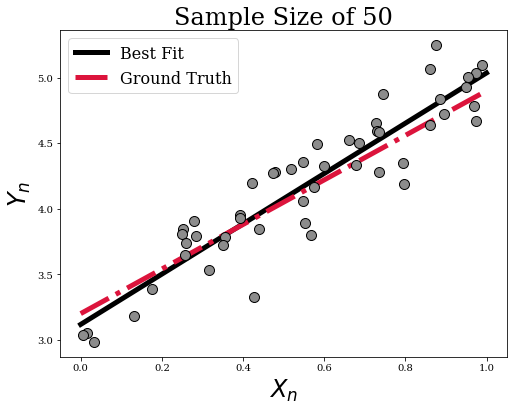

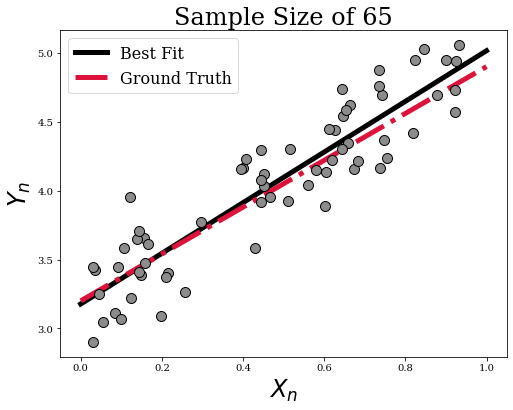

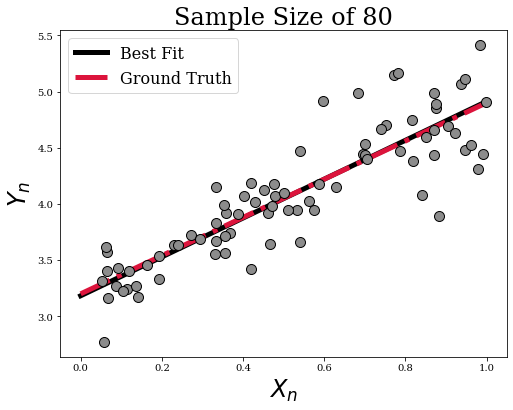

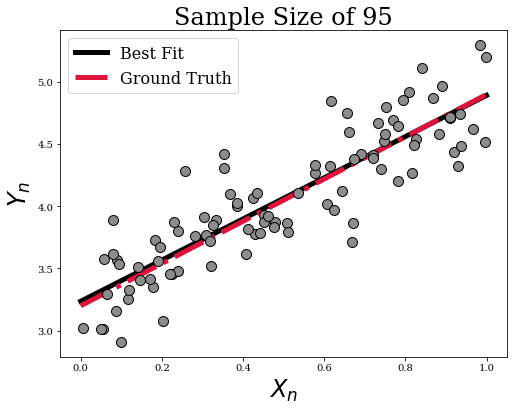

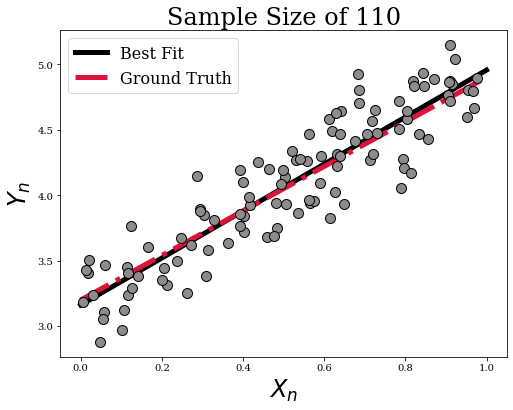

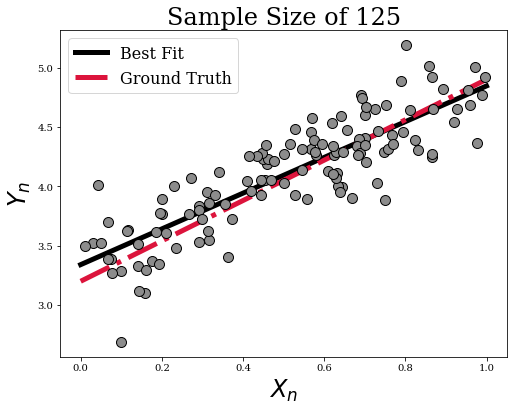

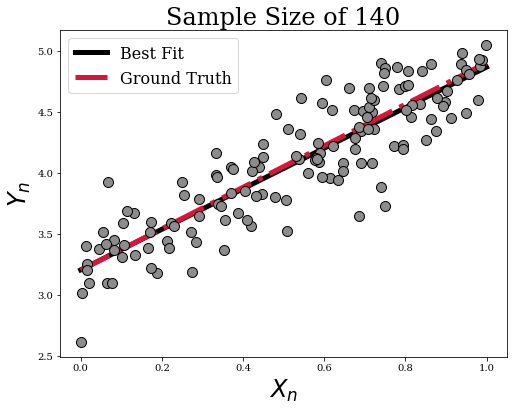

In [13]:
min_sample_size = []
best_beta_hat = []

for ii in np.arange(35, 150, 15):
    
    # Simulate the data for given sample size
    n_val = ii
    x0 = np.ones(n_val)
    x1 = np.random.uniform(0.0, 1.0, n_val)
    y = beta0_truth + beta1_truth*x1
    e = np.random.normal(0.0, 0.25, n_val)
    y += e
    X = np.column_stack((x0, x1))
    
    # Fit $\hat{\beta}$ for the sample
    beta_hat = np.linalg.lstsq(X, y, rcond=None)[0]
    beta0_hat = beta_hat[0]
    beta1_hat = beta_hat[1]
    
    # Plot the fit
    fig = plt.figure(figsize=(8,6))
    plt.scatter(x1, y, 
                s = 100,
                c='#8c8c8c', 
                edgecolor='k',
                zorder=1)

    y_hat = beta0_hat + beta1_hat*x_grid
    plt.plot(x_grid, y_hat, 
             c='k', linewidth=5,
             label='Best Fit',
             zorder=0)
    plt.plot(x_grid, y_true, 
             c='Crimson', linewidth=5,
             linestyle='-.',
             label='Ground Truth',
             zorder=0)

    plt.xlabel('$X_n$'.format(n_val), fontsize=24)
    plt.ylabel('$Y_n$'.format(n_val), fontsize=24)
    plt.legend(loc='upper left', fontsize=16)
    plt.title('Sample Size of {}'.format(n_val), fontsize=24)
    
    #Save min. sample size within 1 sig fig
    
    beta0_diff = np.abs(np.round(beta0_hat, 1) - beta0_truth)
    beta1_diff = np.abs(np.round(beta1_hat, 1) - beta1_truth)
    
    if not min_sample_size and beta0_diff == 0.0 and beta1_diff == 0.0:
        min_sample_size = ii
        best_beta_hat = [beta0_hat, beta1_hat]
        print("minimum sample size = {}".format(min_sample_size))
        print("best_beta0_hat = {}".format(beta0_hat) + "\n" + "best_beta1_hat = {}".format(beta1_hat))
        plt.savefig('best_ls_fit.png')

In [14]:
min_sample_size

80

Turns out we didn't need a sample size that much larger, but that's largely due to the fact that we added small variance in the normally distributed scatter. How do you think the needed minimum sample size will change as the variance in the scatter goes up? Test your hypothesis in the following cell.